In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df= pd.read_excel("Churn_Modelling.xlsx")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.shape

(10000, 14)

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
df.drop(columns=["RowNumber"],axis=1,inplace=True)

In [23]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df["Balance"].replace(0.00,np.nan,inplace=True)

In [25]:
df["Balance"].replace(np.nan,df["Balance"].mean(),inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [27]:
df["Geography"]=le.fit_transform(df["Geography"])

In [28]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,119827.493793,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,119827.493793,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.820000,1,1,1,79084.10,0


In [39]:
df[df==0].sum()

CustomerId         0.0
Surname              0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: object

<BarContainer object of 10000 artists>

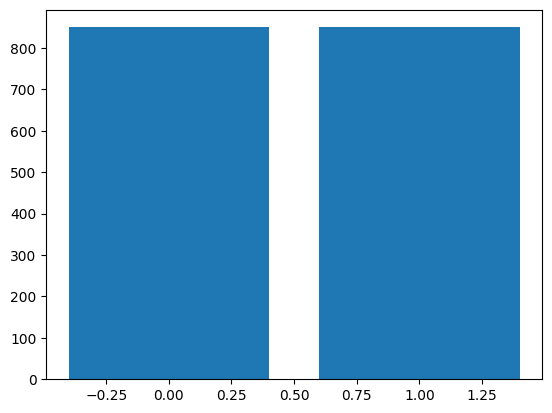

In [34]:
plt.bar(df["Exited"],df["CreditScore"])

In [29]:
df["Gender"].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [30]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int32  
 4   Gender           10000 non-null  int32  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 937.6+ KB


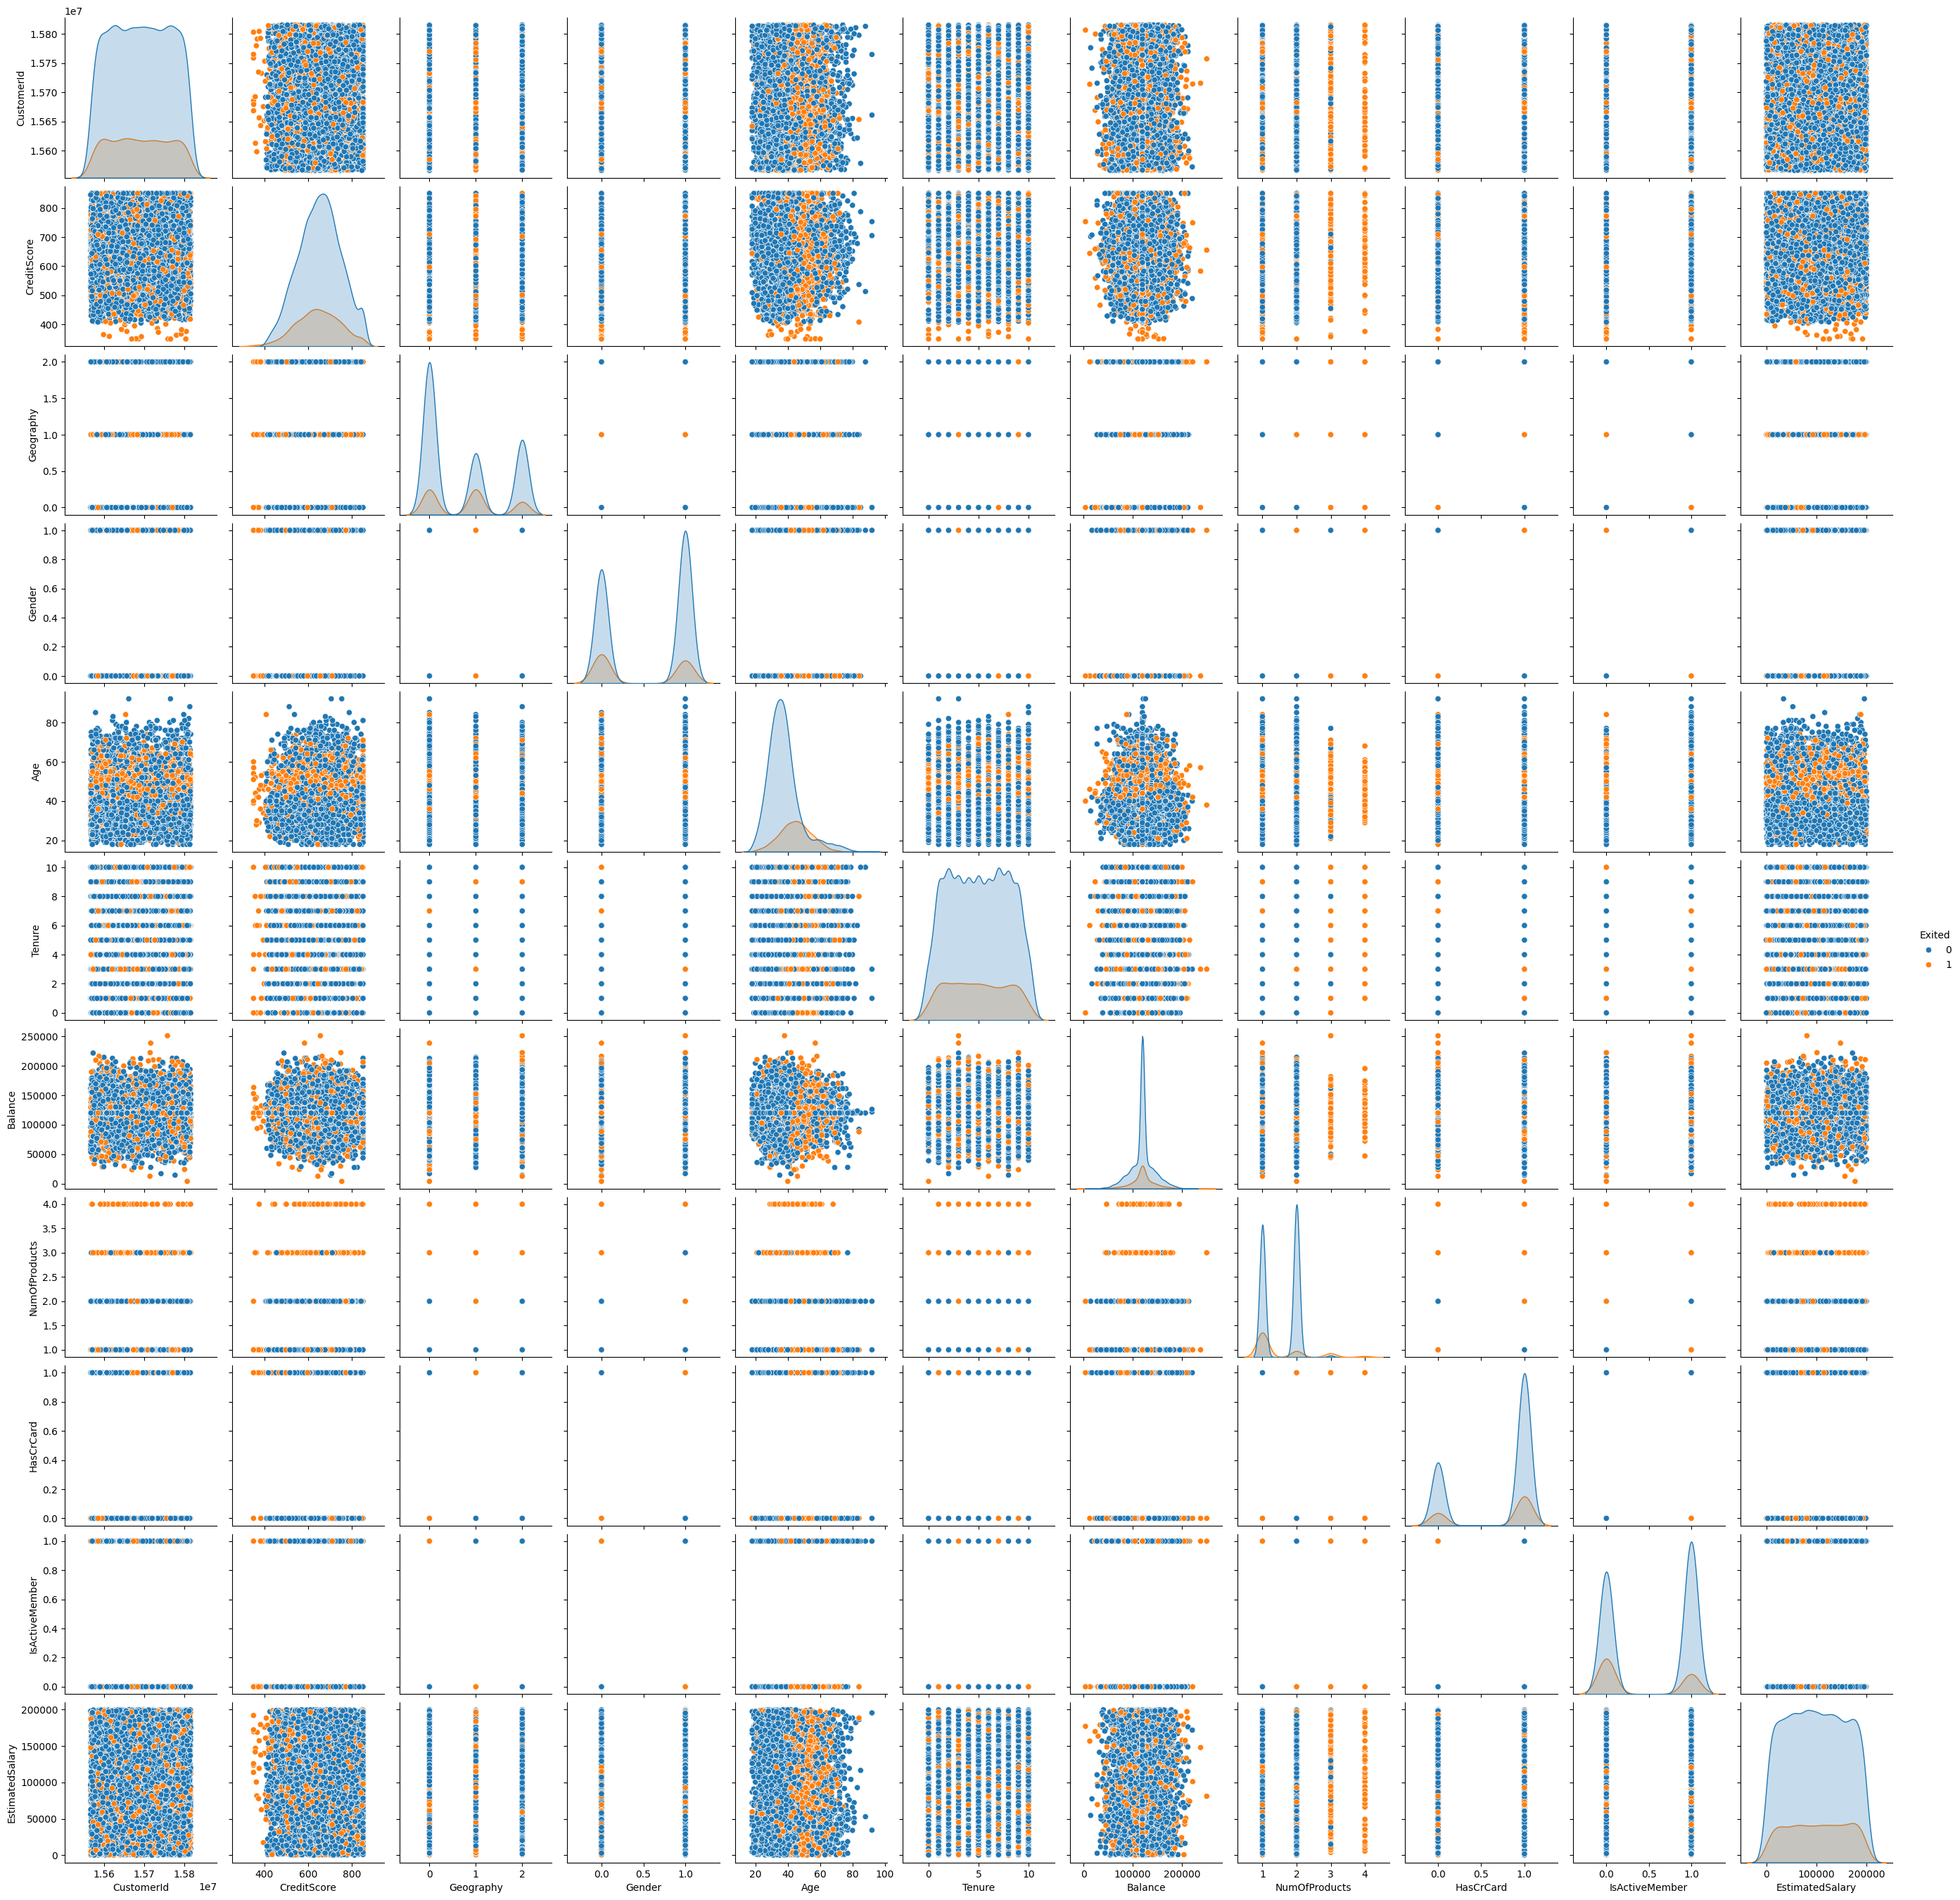

In [36]:
sns.pairplot(data=df,hue="Exited")

In [40]:
feature=["CreditScore",	"Geography",	"Gender",	"Age"	,"Tenure",	"Balance",	"NumOfProducts"	,"HasCrCard",	"IsActiveMember",	"EstimatedSalary"]

In [41]:
X=df[feature]
y=df["Exited"]

In [44]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=10)

In [45]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier()

In [46]:
predection = model.predict(Xtest)

In [54]:
accuracy = model.score(Xtest, Ytest)
accuracy

0.7845

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytest,predection)

0.7845

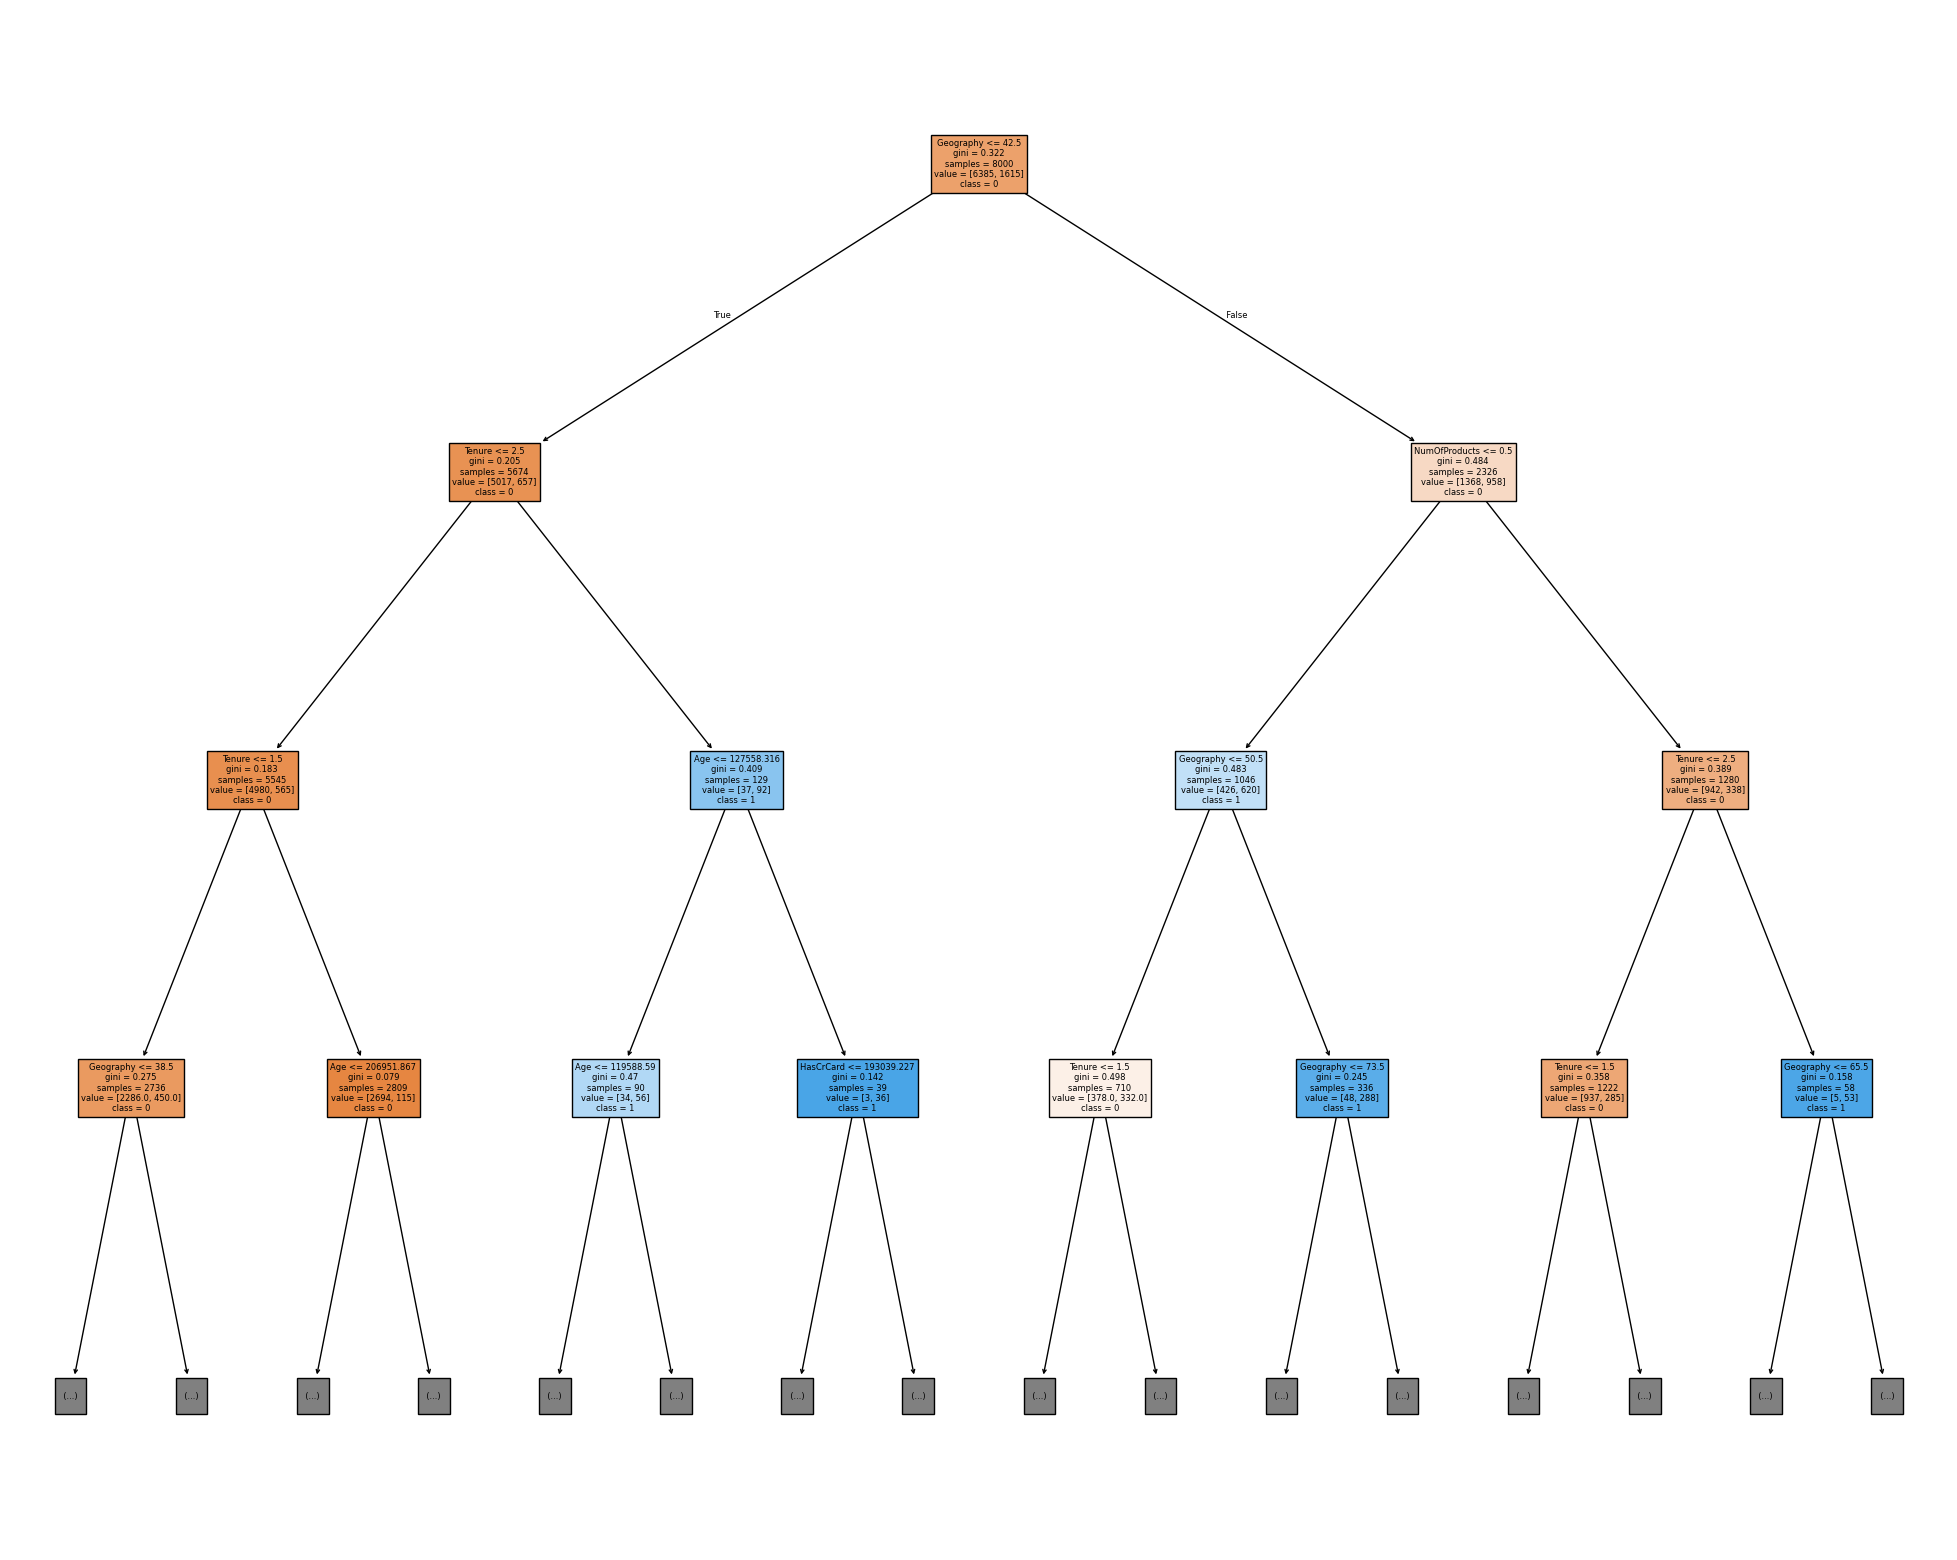

In [55]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   max_depth=3,
                   feature_names=df.columns[:-1],  
                   class_names=['0','1'],
                   filled=True)